## Four seasons time series plots

### Goals:
* Create time series of various fields compared to obs (ERA5)

### Requirements:
* Unlike other notebooks here, this requires loading e3sm_unified environment and using that kernel. 

* Example of required libraries are xcdat, cdutil, genutil, MV2

### Getting running
First, you will want to access a jupyter notebook on perlmutter by accessing https://jupyter.nersc.gov/

Before you can start running this notebook, you will need to set up your environment.
1) Open up a ssh terminal on perlmutter and then load e3sm_unified:
``` source /global/common/software/e3sm/anaconda_envs/load_latest_e3sm_unified_pm-cpu.sh ```

2) Then create an ipython kernel with the environment:
``` python -m ipykernel install --user --name latest_e3sm_unified --display-name latest_e3sm_unified ```

When you open this notebook, you will then want to make sure you load `latest_e3sm_unified`, as indicated on the top right of the window. 



In [2]:
import matplotlib.pyplot as plt

In [3]:
import cdms2
import cdutil
import genutil
import numpy as np
import pylab as pl
cdms2.setAutoBounds(1)
#import xarray

import xcdat

import MV2

In [4]:
import cftime

In [4]:
# Load SCREAMv1 regridded files with the Vert Int output
directory_prefix='/global/cfs/cdirs/e3sm/terai/SCREAM/v1_production'
f_Jan_VertIntegrals=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY2/output.scream.VertIntegrals.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Apr_VertIntegrals=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_Apr2013/output.scream.VertIntegrals.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Aug_VertIntegrals=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY1/output.scream.VertIntegrals.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Oct_VertIntegrals=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_40dayrun/output.scream.VertIntegrals.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)


In [10]:
# Load CERES (obs) datasets
directory_prefix='/global/cfs/cdirs/e3sm/terai/Obs_datasets/ERA5/'
f_Jan_ERA5=xcdat.open_dataset(directory_prefix+'ERA5_surf_20200101_20200229.nc', add_bounds=True)
f_Apr_ERA5=xcdat.open_dataset(directory_prefix+'ERA5_humidity_20130401_20130530.nc', add_bounds=True)
f_Aug_ERA5=xcdat.open_dataset(directory_prefix+'ERA5_humidity_20160801_20160930.nc', add_bounds=True)
f_Oct_ERA5=xcdat.open_dataset(directory_prefix+'ERA5_humidity_20131001_20131130.nc', add_bounds=True)

In [6]:
f_Jan_VertIntegrals

<xarray.Dataset>
Dimensions:            (lat: 256, lon: 512, nbnd: 2, time: 3840, bnds: 2)
Coordinates:
  * lat                (lat) float64 -90.0 -89.29 -88.59 ... 88.59 89.29 90.0
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * time               (time) object 2020-01-20 00:15:00 ... 2020-02-29 00:00:00
Dimensions without coordinates: nbnd, bnds
Data variables: (12/16)
    lat_bnds           (lat, nbnd) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
    lon_bnds           (lon, nbnd) float64 dask.array<chunksize=(512, 2), meta=np.ndarray>
    gw                 (lat) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    area               (lat, lon) float64 dask.array<chunksize=(256, 512), meta=np.ndarray>
    IceWaterPath       (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    LiqWaterPath       (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    ...                 ...
    ZonalVapFlux       (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    cldhgh             (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    cldlow             (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    cldmed             (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    cldtot             (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    time_bnds          (time, bnds) object 2020-01-20 00:07:30 ... 2020-02-29...
Attributes: (12/25)
    source:                    E3SM Atmosphere Model Version 4
    case:                      TEST 1
    title:                     EAMv4 History File
    git_hash:                  THE GIT LOG HASH
    host:                      THE HOST
    Version:                   1.0
    ...                        ...
    remap_hostname:            andes-login7.olcf.ornl.gov
    remap_version:             5.1.0
    NCO:                       netCDF Operators version 5.1.0 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /gpfs/alpine/cli115/proj-shared/terai/maps/map...
    input_file:                /gpfs/alpine/cli115/proj-shared/donahue/e3sm_s...

In [7]:
weights=f_Apr_VertIntegrals["area"]
glb_mean_WaterVaporPath_v1_Apr=f_Apr_VertIntegrals.spatial.average

glb_mean_WaterVaporPath_v1_Jan=np.array(f_Jan_VertIntegrals.spatial.average("VapWaterPath",axis="XY",weights=weights)["VapWaterPath"])
glb_mean_WaterVaporPath_v1_Apr=np.array(f_Apr_VertIntegrals.spatial.average("VapWaterPath",axis="XY",weights=weights)["VapWaterPath"])
glb_mean_WaterVaporPath_v1_Aug=np.array(f_Aug_VertIntegrals.spatial.average("VapWaterPath",axis="XY",weights=weights)["VapWaterPath"])
glb_mean_WaterVaporPath_v1_Oct=np.array(f_Oct_VertIntegrals.spatial.average("VapWaterPath",axis="XY",weights=weights)["VapWaterPath"])

In [11]:
# For v0 DYAMOND2 sim
directory_prefix='/global/cfs/cdirs/e3sm/terai/SCREAM/DYAMOND2/Output/20201127/regridded/'
f_v0_Jan_h0=xcdat.open_mfdataset(directory_prefix+'/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h0.*nc', add_bounds=True, parallel=True, drop_variables=('P3_input_dim', 'P3_output_dim'))
glb_mean_WaterVaporPath_v0_Jan=np.array(f_v0_Jan_h0.spatial.average("TMQ",axis="XY",weights=weights)["TMQ"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))

In [8]:
#weights_ERA5=f_Jan_ERA5["area"]

glb_mean_WaterVaporPath_ERA5_Jan=np.array(f_Jan_ERA5.spatial.average("tcwv",axis="XY")["tcwv"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))
glb_mean_WaterVaporPath_ERA5_Apr=np.array(f_Apr_ERA5.spatial.average("tcwv",axis="XY")["tcwv"].sel(time=slice('2013-04-01 00:00:00', '2013-05-10 23:59:59')))
glb_mean_WaterVaporPath_ERA5_Aug=np.array(f_Aug_ERA5.spatial.average("tcwv",axis="XY")["tcwv"].sel(time=slice('2016-08-01 00:00:00', '2016-09-09 23:59:59')))
glb_mean_WaterVaporPath_ERA5_Oct=np.array(f_Oct_ERA5.spatial.average("tcwv",axis="XY")["tcwv"].sel(time=slice('2013-10-01 00:00:00', '2013-11-09 23:59:59')))

In [19]:
import matplotlib.dates as mdates
import matplotlib.units as munits
import datetime
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

In [10]:
f_Jan_ERA5.indexes['time'].to_datetimeindex()[152]

Timestamp('2020-01-20 00:00:00')

/tmp/ipykernel_119022/1578300377.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_WaterVaporPath_v0_Jan,label='SCREAMv0')


(22.5, 27.75)

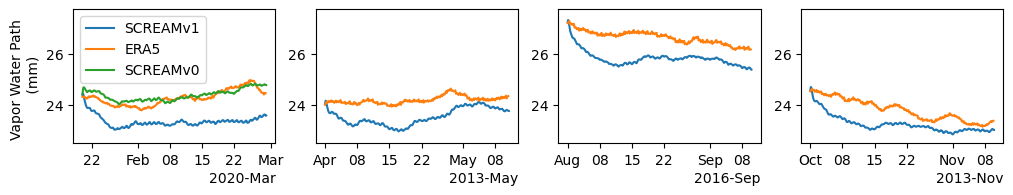

In [22]:
fig=plt.figure(figsize=(12,8))
axs=fig.add_subplot(4,4,1)
plt.plot(f_Jan_VertIntegrals.indexes['time'].to_datetimeindex(),glb_mean_WaterVaporPath_v1_Jan,label='SCREAMv1')
plt.plot(f_Jan_ERA5.indexes['time'].to_datetimeindex()[152:-8],glb_mean_WaterVaporPath_ERA5_Jan,label='ERA5')
plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_WaterVaporPath_v0_Jan,label='SCREAMv0')
plt.ylim((22.5,27.75))
plt.ylabel('Vapor Water Path \n (mm)')
plt.legend(loc='upper left',fontsize=10)

axs=fig.add_subplot(4,4,2)
plt.plot(f_Apr_VertIntegrals.indexes['time'].to_datetimeindex(),glb_mean_WaterVaporPath_v1_Apr)
plt.plot(f_Apr_ERA5.indexes['time'].to_datetimeindex()[:-160],glb_mean_WaterVaporPath_ERA5_Apr)
plt.ylim((22.5,27.75))

axs=fig.add_subplot(4,4,3)
plt.plot(f_Aug_VertIntegrals.indexes['time'].to_datetimeindex(),glb_mean_WaterVaporPath_v1_Aug)
plt.plot(f_Aug_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_WaterVaporPath_ERA5_Aug)
plt.ylim((22.5,27.75))

axs=fig.add_subplot(4,4,4)
plt.plot(f_Oct_VertIntegrals.indexes['time'].to_datetimeindex(),glb_mean_WaterVaporPath_v1_Oct)
plt.plot(f_Oct_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_WaterVaporPath_ERA5_Oct)
plt.ylim((22.5,27.75))


## Obtain T2m and precipitation rate

In [5]:
# Load SCREAMv1 regridded files with the Vert Int output
directory_prefix='/global/cfs/cdirs/e3sm/terai/SCREAM/v1_production'
f_Jan_SurfVars=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY2/output.scream.SurfVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Apr_SurfVars=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_Apr2013/output.scream.SurfVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Aug_SurfVars=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_DY1/output.scream.SurfVars.INSTANT.nmins_x15.20*nc', add_bounds=True, parallel=True)
f_Oct_SurfVars=xcdat.open_mfdataset(directory_prefix+'/ne1024pg2_ne1024pg2_40dayrun/output.scream.SurfVars.INSTANT.nmins_x15.20*nc', add_bounds=True)


In [9]:
weights=f_Apr_SurfVars["area"]

glb_mean_T_2m_v1_Jan=np.array(f_Jan_SurfVars.spatial.average("T_2m",axis="XY",weights=weights)["T_2m"])
glb_mean_T_2m_v1_Apr=np.array(f_Apr_SurfVars.spatial.average("T_2m",axis="XY",weights=weights)["T_2m"])
glb_mean_T_2m_v1_Aug=np.array(f_Aug_SurfVars.spatial.average("T_2m",axis="XY",weights=weights)["T_2m"])
glb_mean_T_2m_v1_Oct=np.array(f_Oct_SurfVars.spatial.average("T_2m",axis="XY",weights=weights)["T_2m"])

In [13]:
directory_prefix='/global/cfs/cdirs/e3sm/terai/SCREAM/DYAMOND2/Output/20201127/regridded/'
f_v0_Jan_h1=xcdat.open_mfdataset(directory_prefix+'/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.*nc', add_bounds=True, parallel=True, drop_variables=('P3_input_dim', 'P3_output_dim'))
glb_mean_T_2m_v0_Jan=np.array(f_v0_Jan_h1.spatial.average("TREFHT",axis="XY",weights=weights)["TREFHT"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))

In [14]:
#weights_ERA5=f_Jan_ERA5["area"]

glb_mean_T_2m_ERA5_Jan=np.array(f_Jan_ERA5.spatial.average("t2m",axis="XY")["t2m"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))
glb_mean_T_2m_ERA5_Apr=np.array(f_Apr_ERA5.spatial.average("t2m",axis="XY")["t2m"].sel(time=slice('2013-04-01 00:00:00', '2013-05-10 23:59:59')))
glb_mean_T_2m_ERA5_Aug=np.array(f_Aug_ERA5.spatial.average("t2m",axis="XY")["t2m"].sel(time=slice('2016-08-01 00:00:00', '2016-09-09 23:59:59')))
glb_mean_T_2m_ERA5_Oct=np.array(f_Oct_ERA5.spatial.average("t2m",axis="XY")["t2m"].sel(time=slice('2013-10-01 00:00:00', '2013-11-09 23:59:59')))

/tmp/ipykernel_152304/3754894009.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_T_2m_v0_Jan,label='SCREAMv0')


(285.0, 291.5)

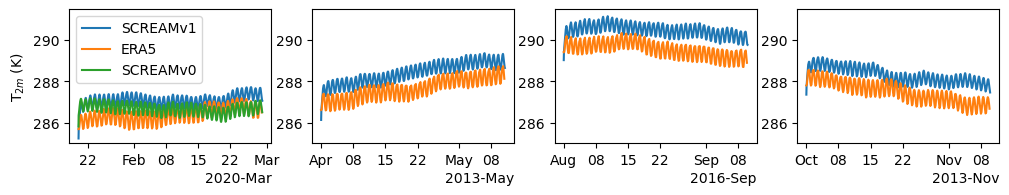

In [20]:
fig=plt.figure(figsize=(12,8))
axs=fig.add_subplot(4,4,1)
plt.plot(f_Jan_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_T_2m_v1_Jan,label='SCREAMv1')
plt.plot(f_Jan_ERA5.indexes['time'].to_datetimeindex()[152:-8],glb_mean_T_2m_ERA5_Jan,label='ERA5')
plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_T_2m_v0_Jan,label='SCREAMv0')
plt.ylim((285,291.5))
plt.ylabel('T$_{2m}$ (K)')
plt.legend(loc='upper left',fontsize=10)

axs=fig.add_subplot(4,4,2)
plt.plot(f_Apr_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_T_2m_v1_Apr)
plt.plot(f_Apr_ERA5.indexes['time'].to_datetimeindex()[:-160],glb_mean_T_2m_ERA5_Apr)
plt.ylim((285,291.5))

axs=fig.add_subplot(4,4,3)
plt.plot(f_Aug_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_T_2m_v1_Aug)
plt.plot(f_Aug_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_T_2m_ERA5_Aug)
plt.ylim((285,291.5))

axs=fig.add_subplot(4,4,4)
plt.plot(f_Oct_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_T_2m_v1_Oct)
plt.plot(f_Oct_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_T_2m_ERA5_Oct)
plt.ylim((285,291.5))


In [21]:
f_Jan_SurfVars

<xarray.Dataset>
Dimensions:               (lat: 256, lon: 512, nbnd: 2, time: 3840, bnds: 2)
Coordinates:
  * lat                   (lat) float64 -90.0 -89.29 -88.59 ... 88.59 89.29 90.0
  * lon                   (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * time                  (time) object 2020-01-20 00:15:00 ... 2020-02-29 00...
Dimensions without coordinates: nbnd, bnds
Data variables: (12/18)
    lat_bnds              (lat, nbnd) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
    lon_bnds              (lon, nbnd) float64 dask.array<chunksize=(512, 2), meta=np.ndarray>
    gw                    (lat) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    area                  (lat, lon) float64 dask.array<chunksize=(256, 512), meta=np.ndarray>
    LW_flux_dn@bot        (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    LW_flux_up@bot        (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    ...                    ...
    qv_2m                 (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    surf_evap             (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    surf_radiative_T      (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    surf_sens_flux        (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    wind_speed_10m        (time, lat, lon) float32 dask.array<chunksize=(96, 256, 512), meta=np.ndarray>
    time_bnds             (time, bnds) object 2020-01-20 00:07:30 ... 2020-02...
Attributes: (12/25)
    source:                    E3SM Atmosphere Model Version 4
    case:                      TEST 1
    title:                     EAMv4 History File
    git_hash:                  THE GIT LOG HASH
    host:                      THE HOST
    Version:                   1.0
    ...                        ...
    remap_hostname:            andes-login7.olcf.ornl.gov
    remap_version:             5.1.0
    NCO:                       netCDF Operators version 5.1.0 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /gpfs/alpine/cli115/proj-shared/terai/maps/map...
    input_file:                /gpfs/alpine/cli115/proj-shared/donahue/e3sm_s...

In [22]:
# precipitation rate
# liquid mass
glb_mean_precip_liq_surf_mass_v1_Jan=np.array(f_Jan_SurfVars.spatial.average("precip_liq_surf_mass",axis="XY",weights=weights)["precip_liq_surf_mass"])
glb_mean_precip_liq_surf_mass_v1_Apr=np.array(f_Apr_SurfVars.spatial.average("precip_liq_surf_mass",axis="XY",weights=weights)["precip_liq_surf_mass"])
glb_mean_precip_liq_surf_mass_v1_Aug=np.array(f_Aug_SurfVars.spatial.average("precip_liq_surf_mass",axis="XY",weights=weights)["precip_liq_surf_mass"])
glb_mean_precip_liq_surf_mass_v1_Oct=np.array(f_Oct_SurfVars.spatial.average("precip_liq_surf_mass",axis="XY",weights=weights)["precip_liq_surf_mass"])
# ice mass
glb_mean_precip_ice_surf_mass_v1_Jan=np.array(f_Jan_SurfVars.spatial.average("precip_ice_surf_mass",axis="XY",weights=weights)["precip_ice_surf_mass"])
glb_mean_precip_ice_surf_mass_v1_Apr=np.array(f_Apr_SurfVars.spatial.average("precip_ice_surf_mass",axis="XY",weights=weights)["precip_ice_surf_mass"])
glb_mean_precip_ice_surf_mass_v1_Aug=np.array(f_Aug_SurfVars.spatial.average("precip_ice_surf_mass",axis="XY",weights=weights)["precip_ice_surf_mass"])
glb_mean_precip_ice_surf_mass_v1_Oct=np.array(f_Oct_SurfVars.spatial.average("precip_ice_surf_mass",axis="XY",weights=weights)["precip_ice_surf_mass"])

glb_mean_precip_v1_Jan=(glb_mean_precip_liq_surf_mass_v1_Jan+glb_mean_precip_ice_surf_mass_v1_Jan)*3600./100.*24.
glb_mean_precip_v1_Apr=(glb_mean_precip_liq_surf_mass_v1_Apr+glb_mean_precip_ice_surf_mass_v1_Apr)*3600./100.*24.
glb_mean_precip_v1_Aug=(glb_mean_precip_liq_surf_mass_v1_Aug+glb_mean_precip_ice_surf_mass_v1_Aug)*3600./100.*24.
glb_mean_precip_v1_Oct=(glb_mean_precip_liq_surf_mass_v1_Oct+glb_mean_precip_ice_surf_mass_v1_Oct)*3600./100.*24.

glb_mean_precip_v0_Jan=np.array(f_v0_Jan_h1.spatial.average("PRECT",axis="XY",weights=weights)["PRECT"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))*3600.*1000.*24.

In [24]:
# ERA5 precip
glb_mean_precip_ERA5_Jan=np.array(f_Jan_ERA5.spatial.average("mtpr",axis="XY")["mtpr"].sel(time=slice('2020-01-20 00:00:00', '2020-02-28 23:59:59')))*3600.*24.
glb_mean_precip_ERA5_Apr=np.array(f_Apr_ERA5.spatial.average("mtpr",axis="XY")["mtpr"].sel(time=slice('2013-04-01 00:00:00', '2013-05-10 23:59:59')))*3600.*24.
glb_mean_precip_ERA5_Aug=np.array(f_Aug_ERA5.spatial.average("mtpr",axis="XY")["mtpr"].sel(time=slice('2016-08-01 00:00:00', '2016-09-09 23:59:59')))*3600.*24.
glb_mean_precip_ERA5_Oct=np.array(f_Oct_ERA5.spatial.average("mtpr",axis="XY")["mtpr"].sel(time=slice('2013-10-01 00:00:00', '2013-11-09 23:59:59')))*3600.*24.

/tmp/ipykernel_152304/247968081.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_precip_v0_Jan,color='tab:green',label='SCREAMv0')


(1.5, 4.5)

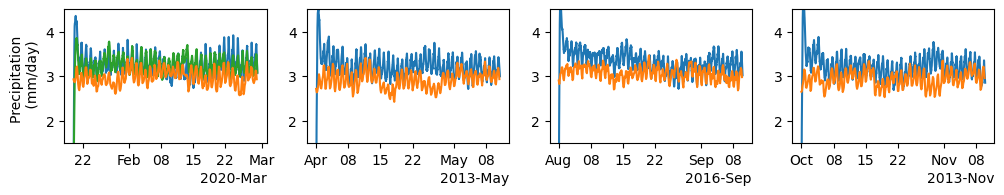

In [30]:
fig=plt.figure(figsize=(12,8))
axs=fig.add_subplot(4,4,1)
plt.plot(f_Jan_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_precip_v1_Jan,color='tab:blue',label='SCREAMv1')
plt.plot(f_v0_Jan_h0.indexes['time'].to_datetimeindex()[:-96],glb_mean_precip_v0_Jan,color='tab:green',label='SCREAMv0')
plt.plot(f_Jan_ERA5.indexes['time'].to_datetimeindex()[152:-8],glb_mean_precip_ERA5_Jan,color='tab:orange',label='ERA5')
plt.ylim((1.5,4.5))
plt.ylabel('Precipitation \n (mm/day)')
#plt.legend(loc='lower right',fontsize=10)

axs=fig.add_subplot(4,4,2)
plt.plot(f_Apr_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_precip_v1_Apr)
plt.plot(f_Apr_ERA5.indexes['time'].to_datetimeindex()[:-160],glb_mean_precip_ERA5_Apr)
plt.ylim((1.5,4.5))

axs=fig.add_subplot(4,4,3)
plt.plot(f_Aug_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_precip_v1_Aug)
plt.plot(f_Aug_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_precip_ERA5_Aug)
plt.ylim((1.5,4.5))

axs=fig.add_subplot(4,4,4)
plt.plot(f_Oct_SurfVars.indexes['time'].to_datetimeindex(),glb_mean_precip_v1_Oct)
plt.plot(f_Oct_ERA5.indexes['time'].to_datetimeindex()[:-168],glb_mean_precip_ERA5_Oct)
plt.ylim((1.5,4.5))


## Obtain 10-m wind speed